In [1]:
from PIL import Image
from cv2 import Laplacian
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import unsharp_mask, meijering, sato, scharr, hessian
from skimage.exposure import exposure, equalize_hist, equalize_adapthist
import cv2 as cv

In [17]:
img1 = "C://Users//Admin//Desktop//Opencv//X-ray//image1.jpg"
img2 =  "C://Users//Admin//Desktop//Opencv//X-ray//image2.jpg"
img3 =  "C://Users//Admin//Desktop//Opencv//X-ray//image3.jpg"
img4 =  "C://Users//Admin//Desktop//Opencv//X-ray//image4.jpg"
img5 =  "C://Users//Admin//Desktop//Opencv//X-ray//image5.jpg"
img6 =  "C://Users//Admin//Desktop//Opencv//X-ray//image6.jpg"
img7 =  "C://Users//Admin//Desktop//Opencv//X-ray//image7.jpg"
img8 =  "C://Users//Admin//Desktop//Opencv//X-ray//image8.jpg"
img9 =  "C://Users//Admin//Desktop//Opencv//X-ray//image9.jpg"
img10 =  "C://Users//Admin//Desktop//Opencv//X-ray//image10.jpg"

img01 = Image.open(img1)
img02 = Image.open(img2)
img03= Image.open(img3)
img04 = Image.open(img4)
img05= Image.open(img5)
img06= Image.open(img6)
img07= Image.open(img7)
img08= Image.open(img8)
img09= Image.open(img9)
img10= Image.open(img10)

numpy_img01 = np.asarray(img01)
numpy_img02 = np.asarray(img02)
numpy_img03 = np.asarray(img03)
numpy_img04 = np.asarray(img04)
numpy_img05 = np.asarray(img05)
numpy_img06 = np.asarray(img06)
numpy_img07 = np.asarray(img07)
numpy_img08 = np.asarray(img08)
numpy_img09 = np.asarray(img09)
numpy_img10 = np.asarray(img10)


In [3]:
def apply_filter(filter, img):

    if filter == "ree":
        img = cv.adaptiveThreshold(
            img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 5
        )

    if filter == "Blur":
        img = cv.GaussianBlur(img, (3, 3), 0)

    if filter == "Laplacian":
        img2 = cv.GaussianBlur(img, (3, 3), 0)
        lap = cv.Laplacian(img2, cv.CV_16S, ksize=3)
        img = cv.convertScaleAbs(lap)

    if filter == "equalize_hist":
        img = equalize_hist(img, nbins=256, mask=None)

    if filter == "equalize_adapthist":
        img = equalize_adapthist(img, kernel_size=None, clip_limit=0.01, nbins=256)

    if filter == "unsharp":
        img = unsharp_mask(img, radius=5, amount=2)

    if filter == "meijering":
        img = meijering(
            img,
            sigmas=range(1, 10, 2),
            alpha=None,
            black_ridges=True,
            mode="reflect",
            cval=0,
        )

    if filter == "sato":
        img = sato(
            img, sigmas=range(1, 10, 2), black_ridges=True, mode="reflect", cval=0
        )

    if filter == "scharr":
        img = scharr(img, mask=None, axis=None, mode="reflect", cval=0.0)

    if filter == "hessian":
        img = hessian(
            img,
            sigmas=range(1, 10, 2),
            scale_range=None,
            scale_step=None,
            alpha=0.5,
            beta=0.5,
            gamma=15,
            black_ridges=True,
            mode="reflect",
            cval=0,
        )

    return img


In [4]:
def plot_images(title, image, image_processed):
    # Plot both images
    fig, axes = plt.subplots(
        nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 12)
    )
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title("Original image")
    ax[1].imshow(image_processed, cmap=plt.cm.gray)
    ax[1].set_title(title)
    for a in ax:
        a.axis("off")
    fig.tight_layout()
    plt.show()

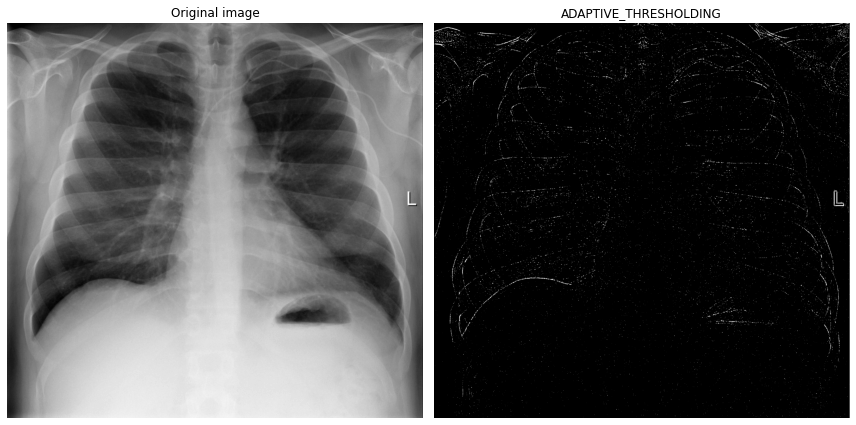

In [6]:
image_out = apply_filter("ree", numpy_img02)
plot_images("ADAPTIVE_THRESHOLDING", numpy_img02, image_out)


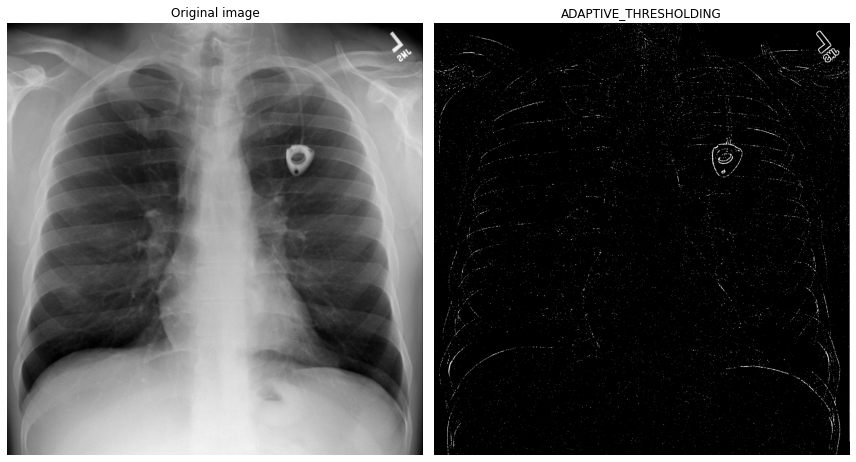

In [8]:
image_out = apply_filter("ree", numpy_img07)
plot_images("ADAPTIVE_THRESHOLDING", numpy_img07, image_out)

Adaptive thresholding is somewhat succesful in detecting the catheter but no claer detection

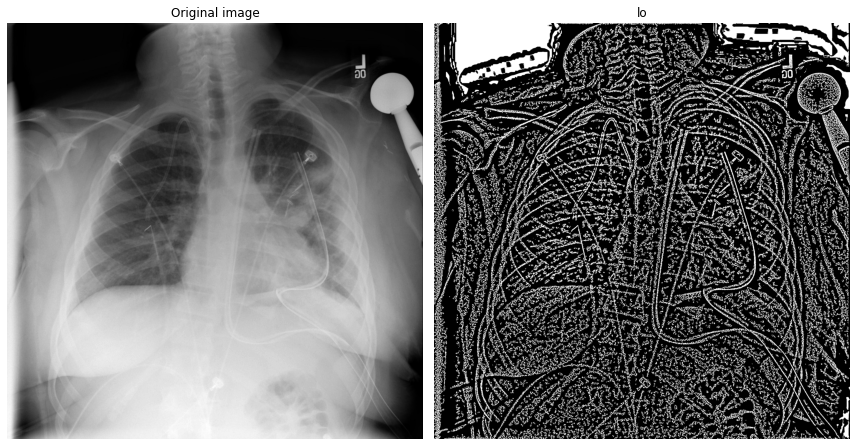

In [19]:
image = apply_filter("hessian", numpy_img03)
image = apply_filter("equalize_adapthist", image)
plot_images("Hessian", numpy_img03, image)


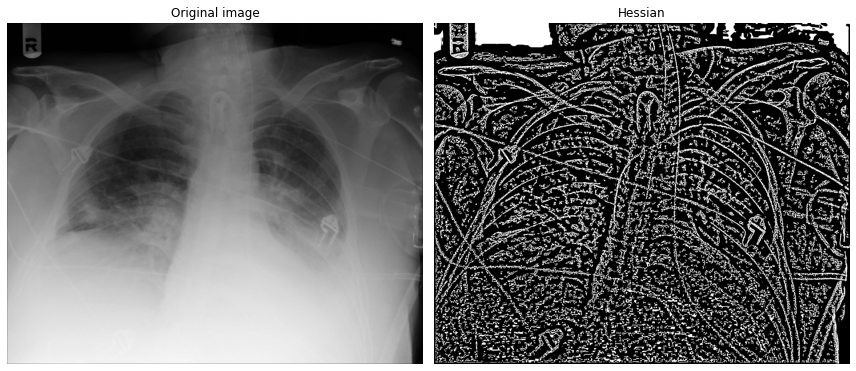

In [11]:
image = apply_filter("hessian", numpy_img06)
image = apply_filter("equalize_adapthist", image)
plot_images("Hessian", numpy_img06, image)

Hessian filter can clearly detect the catheter but one drawback is that the anatomy of the body is too much visible

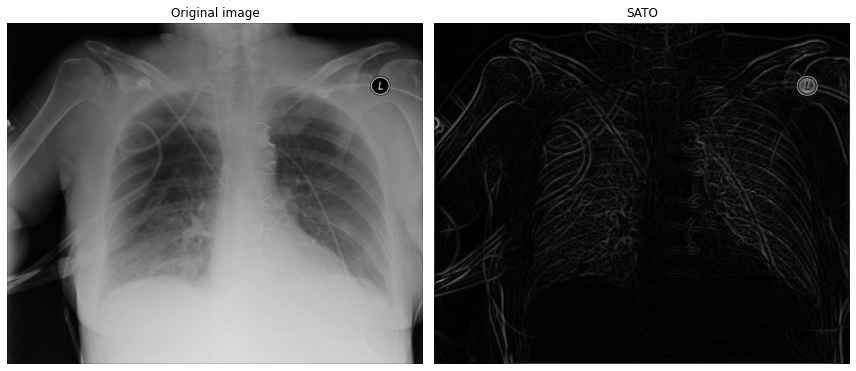

In [13]:

image = apply_filter("unsharp", numpy_img04)
image = apply_filter("equalize_adapthist", image)
image = apply_filter("sato", image)
plot_images("SATO", numpy_img04, image)

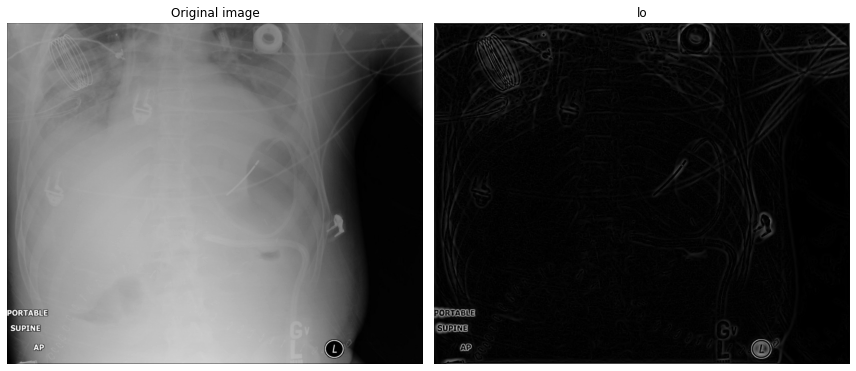

In [12]:

image = apply_filter("unsharp", numpy_img08)
image = apply_filter("equalize_adapthist", image)
image = apply_filter("sato", image)
plot_images("lo", numpy_img08, image)

Sato filter works better than Adaptive thresholding but in some cases it doesnot give the same results.

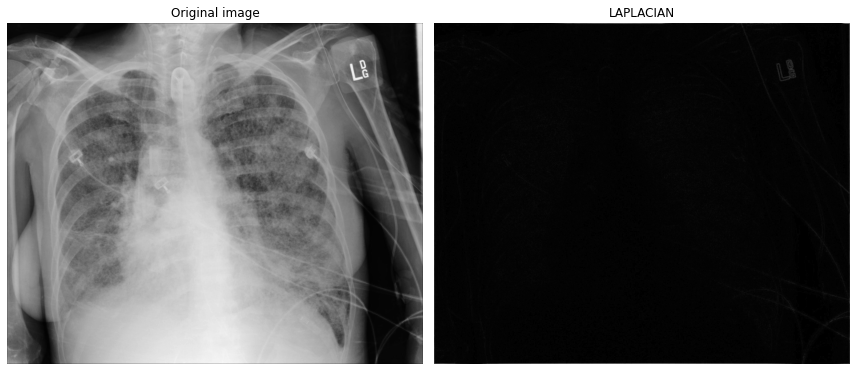

In [14]:
image = apply_filter("Laplacian", numpy_img05)
plot_images("LAPLACIAN", numpy_img05, image)

Laplacian operater is the worst filter for the X-ray. I was curious so I tried it but the results are not at all good

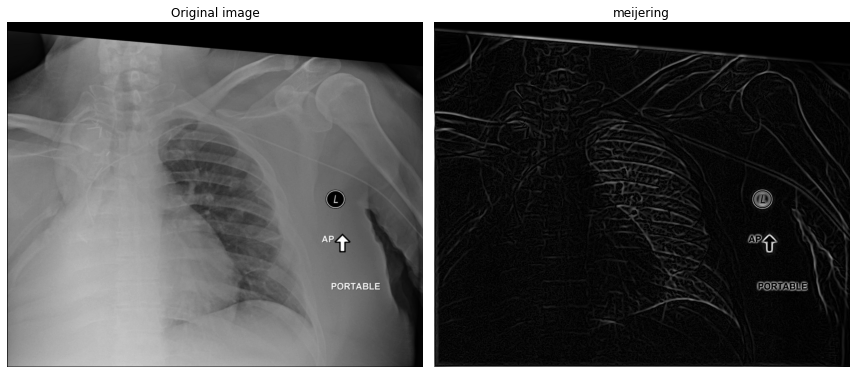

In [15]:
image = apply_filter("unsharp", numpy_img01)
image = apply_filter("equalize_adapthist", image)
image = apply_filter( "meijering", image)
plot_images("meijering", numpy_img01, image)

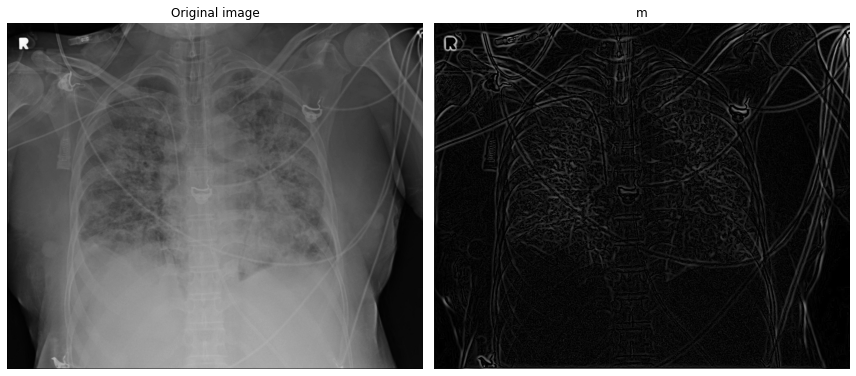

In [16]:
image = apply_filter("unsharp", numpy_img09)
image = apply_filter("equalize_adapthist", image)
image = apply_filter( "meijering", image)
plot_images("meijering", numpy_img09, image)

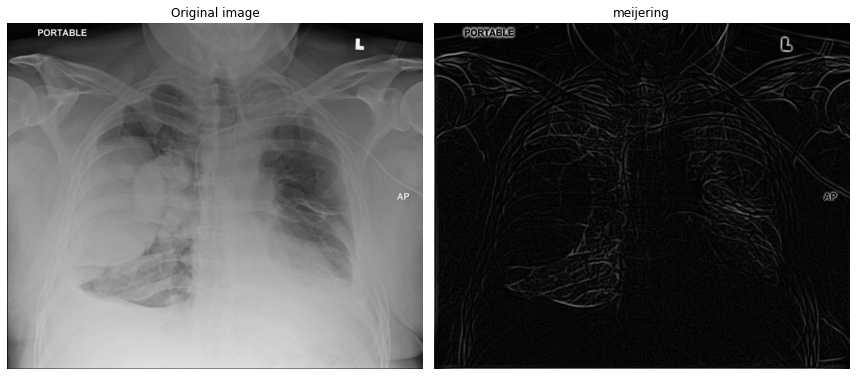

In [18]:
image = apply_filter("unsharp", numpy_img10)
image = apply_filter("equalize_adapthist", image)
image = apply_filter( "meijering", image)
plot_images("meijering", numpy_img10, image)

Meijering filter is the best of all the filters I have used. It gives much better results with varaitions in X-rays

Which filter will you prefer for the detect and visualization of catheters and lines in X-ray
images and why?


Answer:- The maijering filter works best for all the varying in the X-rays and the results are much better than most of the filters out there. So I will use the meijering filter

How can deep learning help to detect presence of catheters and lines in images and
which model you prefer?( coding is not required)

Answer:- With the resurgence of deep learning, supervised training approaches are begining to showing promising results. However, deep annotation maps are entailed. Deep learning can help in learning the pathways, where the catheter go from the maps and can predict the same in different age groups. I would prefer Convolutional Neural Network for this process